<img src="eval.jpg" width="800"/>

## Evaluation Metrics :
Predictive Modeling works on constructive feedback principle. You build a model. Get feedback from metrics, make improvements and continue until you achieve a desirable accuracy. Evaluation metrics explain the performance of a model. An important aspects of evaluation metrics is their capability to discriminate among model results.

Many ingenuous analyst, don’t even evaluate model on different metrics. Once they are finished building a model, they hurriedly map predicted values on unseen data based on Accuracy.There is no one metric for all models.selecting a metric which correctly evaluates the model according to task at hand is important.

#### It is crucial to choose appropirate metric for a model prior to computing predicted values.

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [2]:
iris = load_iris()
logreg = LogisticRegression()

<font color = '#001122AA'>By default cross_validation_score performes three-fold cross validation, returning three accuracy values. </font>

In [3]:
scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross validation scores: {}".format(scores))

Cross validation scores: [ 0.96078431  0.92156863  0.95833333]


<font color = '#001122AA'> We can change the number of folds by changing the $cv$ parameter. </font>

In [4]:
scores = cross_val_score(logreg, iris.data, iris.target, cv = 5)
print("Cross validation scores: {}".format(scores))

Cross validation scores: [ 1.          0.96666667  0.93333333  0.9         1.        ]


<font color='#001122AA'> A comon way to summerize the cross validation accuracy is to compute the mean:  

In [5]:
print("Average cross-validation scroe: {:.2f}".format(scores.mean()))

Average cross-validation scroe: 0.96


### Stratified k-Fold Cross-Validation

<IPython.core.display.Javascript object>


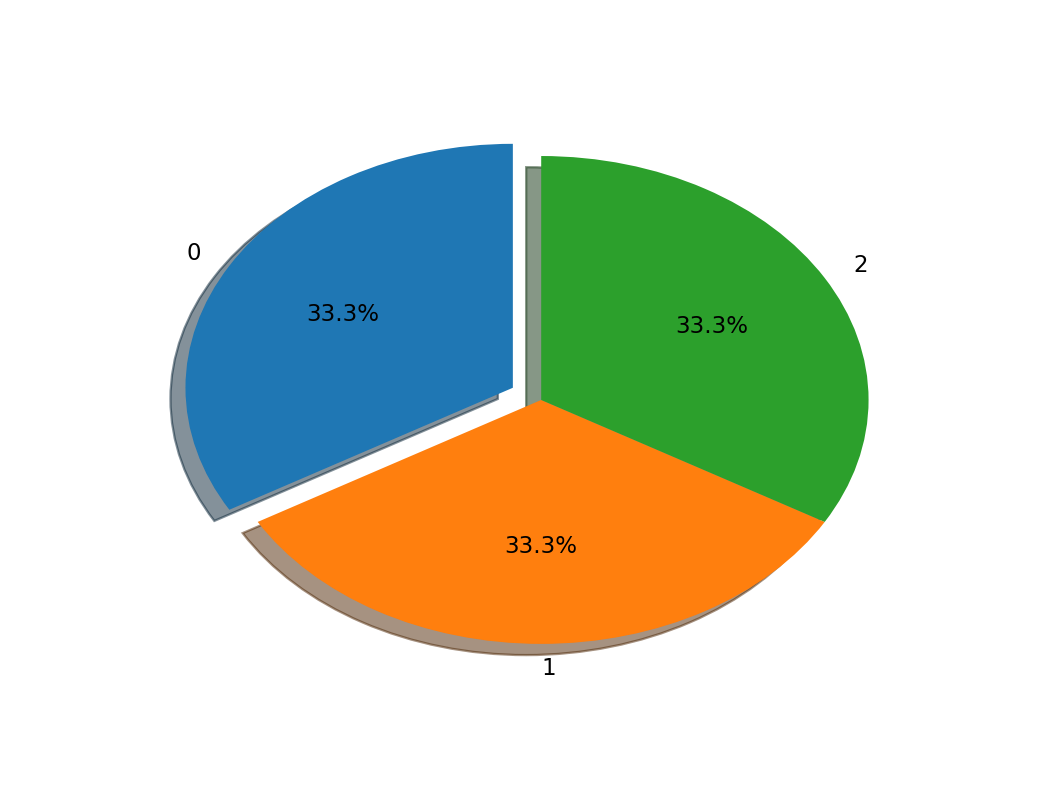

([<matplotlib.patches.Wedge at 0x2a1b4d4860>,
 [Text(-1.03923,0.6,'0'), Text(1.02989e-07,-1.1,'1'), Text(0.952628,0.55,'2')],
 [Text(-0.606218,0.35,'33.3%'),
  Text(5.61761e-08,-0.6,'33.3%'),
  Text(0.519615,0.3,'33.3%')])

In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

explode = [0.1,0,0]
unique, counts = np.unique(iris.target, return_counts=True)
      
plt.pie(counts, labels = unique, autopct='%1.1f%%', shadow=True, startangle=90, explode = explode)

In [7]:
scores = cross_val_score(logreg, iris.data, iris.target, cv = 3)
print("Cross validation scores: {}".format(scores))

Cross validation scores: [ 0.96078431  0.92156863  0.95833333]


In [8]:
from  sklearn.model_selection import StratifiedKFold

scores = cross_val_score(logreg, iris.data, iris.target, cv = StratifiedKFold(3, shuffle = True, random_state = 10))
print("Cross validation scores: {}".format(scores))

Cross validation scores: [ 0.96078431  0.96078431  0.95833333]


### Leave one out

In [9]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.95


### Grid Search

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv=5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.97


In [23]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [32]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)

c:\users\nxs045000\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\nxs045000\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\nxs045000\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
 

In [33]:
scores = np.array(results.mean_test_score).reshape(6, 6)

In [34]:
scores

array([[ 0.36607143,  0.36607143,  0.36607143,  0.36607143,  0.36607143,
         0.36607143],
       [ 0.36607143,  0.36607143,  0.36607143,  0.36607143,  0.36607143,
         0.36607143],
       [ 0.36607143,  0.69642857,  0.91964286,  0.95535714,  0.36607143,
         0.36607143],
       [ 0.69642857,  0.92857143,  0.96428571,  0.94642857,  0.91964286,
         0.50892857],
       [ 0.92857143,  0.96428571,  0.96428571,  0.9375    ,  0.91964286,
         0.5625    ],
       [ 0.96428571,  0.97321429,  0.95535714,  0.94642857,  0.91964286,
         0.5625    ]])

<font color= '#001122AA'> Let's explore digit dataset, which has images of hand written digits labeled with ten classes, representing digits zero through nine.

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


<font color = '#001122AA'> As we can see, there are roughly the same number of instances in each class, so this dataset has balanced classes. Now we are going to create a new dataset with two imblalanced classes, by labeling all none-one digits with 0 and all that are one with 1.

In [2]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [3]:
np.bincount(y_binary_imbalanced)    # Negative class (0) is the most frequent class

array([1615,  182], dtype=int64)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

# Accuracy of Support Vector Machine classifier
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.90888888888888886

### Dummy Classifiers

<font color = '#001122AA'> DummyClassifier is a classifier that makes predictions using simple rules, which can be useful as a baseline for comparison against actual classifiers, especially with imbalanced classes.

In [5]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'stratified').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0,

In [6]:
dummy_majority.score(X_test, y_test)

0.8288888888888889

In [7]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.97777777777777775

### Confusion matrices

#### Binary (two-class) confusion matrix

<font color = '#001122aa'>
Accuracy: for what fraction of all instances is the classifier's prediction correct? $Accuracy = \frac{TN + TP}{TN + FN + TP + FP}$

Classification Error: for what fraction of all instances is the classifier's prediction incorrect? Classification $Error =\frac{FP + FN}{TN + FN + TP + FP}$

Recall, True Positive Rate: What fraction of all positive instances does the classifier correctly identify as positive? $Recall = \frac{TP}{TP + FN}$

Precision: What fraction of positive predictions are correct? $Precision = \frac{TP}{TP + FP}$

False Positive Rate FPR: What fraction of all negative instances does the classifier incorrectly identify as positive? $FPR = \frac{FP}{TN + FP}$

Precision-Recall Tradeoff: Precision and Recall are in inverse relation 

F1-Score: combining Precision and Recall into a single number $F1 = 2. \frac{Precision.Recal}{Precision + Recall}$

In [8]:
from sklearn.metrics import confusion_matrix

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [9]:
# produces random predictions w/ same class proportion as training set
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[364  43]
 [ 41   2]]


In [10]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]


In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[401   6]
 [  6  37]]


In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


### Evaluation metrics for binary classification

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


<font color = '#001122aa'> Combined report with all above metrics

In [14]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



In [15]:
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('Logistic regression\n', 
      classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

Random class-proportional (dummy)
              precision    recall  f1-score   support

      not 1       0.90      0.89      0.90       407
          1       0.04      0.05      0.05        43

avg / total       0.82      0.81      0.82       450

SVM
              precision    recall  f1-score   support

      not 1       0.99      0.99      0.99       407
          1       0.88      0.88      0.88        43

avg / total       0.98      0.98      0.98       450

Logistic regression
              precision    recall  f1-score   support

      not 1       0.99      0.99      0.99       407
          1       0.86      0.86      0.86        43

avg / total       0.97      0.97      0.97       450

Decision tree
              precision    recall  f1-score   support

      not 1       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



### Decision functions

<font color = '#001122aa'> Many classifiers in sklearn can provide information about the uncertainty associated with a particular prediction either by using the decision function method or the predict proba method. given a set of test points, Decision Function indicates how confidently classifier predict the positive class. Hence, a positive class is the collection of all points with large magnitude positive scores, and there will be large magnitude scores for negative points. 
    
The proba function provides predicted probabilities of class membership. Typically in binary classifier, you find the class with probability higher than 50%. Adjusting this decision threshold affects the prediction of the classifier. A higher threshold means that a classifier has to be more confident in predicting the class. For example, we might predict class one only if the estimated probability of class one was over 70%. And this results in a more conservative classifier.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

[(0, -23.176534621637213),
 (0, -13.541141874305895),
 (0, -21.722605145730043),
 (0, -18.90772650215149),
 (0, -19.736149581073654),
 (0, -9.7493149823889187),
 (1, 5.2346236567777726),
 (0, -19.307102576018931),
 (0, -25.101058714685433),
 (0, -21.827074186691704),
 (0, -24.151099458744699),
 (0, -19.576781211490335),
 (0, -22.575033830673416),
 (0, -10.82396314021325),
 (0, -11.912770080196626),
 (0, -10.97983909871442),
 (1, 11.205965930721581),
 (0, -27.64574081882467),
 (0, -12.85935439275039),
 (0, -25.848574585021229)]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

[(0, 8.6011971857065798e-11),
 (0, 1.3156980587779173e-06),
 (0, 3.6812257606113599e-10),
 (0, 6.1443891290770945e-09),
 (0, 2.6834848129210445e-09),
 (0, 5.8331207554380178e-05),
 (1, 0.99469941633163017),
 (0, 4.1212777830982841e-09),
 (0, 1.2553034149158495e-11),
 (0, 3.3160580492239255e-10),
 (0, 3.2457179188381166e-11),
 (0, 3.1471101602294386e-09),
 (0, 1.5695941756664523e-10),
 (0, 1.9916081111892038e-05),
 (0, 6.7041971700079712e-06),
 (0, 1.7041548940868589e-05),
 (1, 0.99998640732513899),
 (0, 9.8538810232775593e-13),
 (0, 2.6016700442596357e-06),
 (0, 5.9443817566590297e-12)]

### Precision-recall curves

<font color = '001122aa'> An ideal classifier should achieve prefect precision and perfect recall. In general, the closer the curve is to the top right corner, the more prefereable it is. 

In the following example the red circle indicates the precision and recall that's achieved when the decision threshold is zero. 

For a particular application, we might pick a specific decision threshold depending on whether we want the classifier to be more or less conservative about making false-positive or false-negative errors. It might not be entirely clear when developing a new model, what the right decision threshold would be, and how that choice will affect evaluation metrics like precision and recall. So instead, we look at how classifier performs for all possible decision thresholds.

<IPython.core.display.Javascript object>


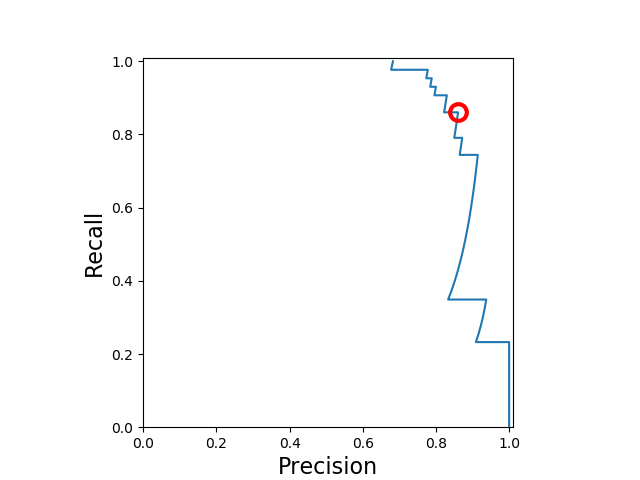

c:\users\nxs045000\appdata\local\programs\python\python35\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [20]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

### ROC curves, Area-Under-Curve (AUC)

<font color = '001122aa'> Precision recall curve is not exactly a smooth curve. There are some jaggy errors and, in fact, the jumps tend to get a little bigger as we approach maximum precision. This is a consequence of how the formulas for precision and recall are computed. They use discrete counts that include the number of true positives. And so as the decision threshold increases, there are fewer and fewer points that remain as positive predictions. So the fractions that are computed for these smaller numbers can change pretty dramatically with small changes in the decision threshold. And that's why these sort of trailing edges of the Precision-recall curve can appear a bit jagged when you plot them. 
    
ROC curves or receiver operating characteristic curves are a very widely used visualization method that illustrate the performance of a binary classifier. ROC curves on the X-axis show a classifier's False Positive Rate so that would go from 0 to 1.0, and on the Y-axis they show a classifier's True Positive Rate so that will also go from 0 to 1.0. The ideal point in ROC space is one where the classifier achieves zero, a false positive rate of zero, and a true positive rate of one. So that would be the upper left corner. 

We use something called area under the curve, AUC. That's the single number that measures this total area underneath the ROC curve as a way to summarize a classifier's performance. So, an AUC of zero represents a very bad classifier, and an AUC of one will represent an optimal classifier. 

output of roc_curve: 
- fpr: false positive rate
- tpr: tru positive rate

<IPython.core.display.Javascript object>


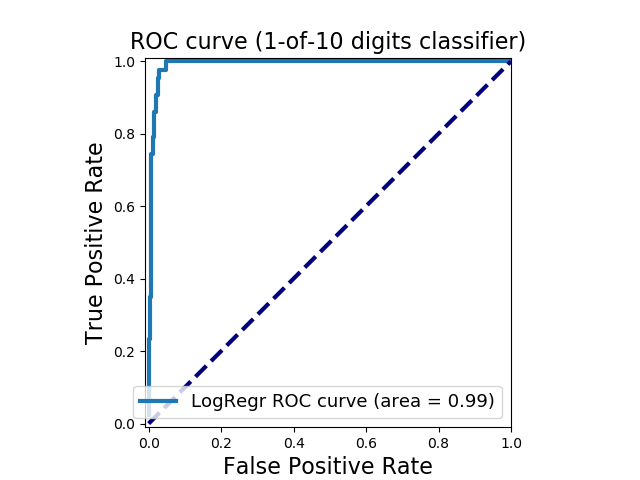

c:\users\nxs045000\appdata\local\programs\python\python35\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [21]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

<IPython.core.display.Javascript object>


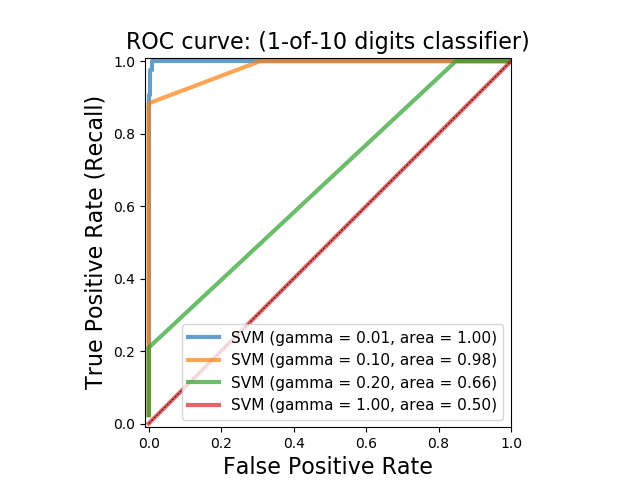

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


c:\users\nxs045000\appdata\local\programs\python\python35\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [22]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

### Regression evaluation metrics

We saw that for classification, because there were some scenarios like medical diagnostics predictions, where the consequences of false positive is very different than false negatives. In evaluating classifiers for example we looked at plots like precision recall curves that could show the trade offs a classifier could achieve between making errors of those two types. In theory, we could apply the same type of error analysis and more detailed evaluation to regression models. In practice though, it turns out that for most applications of regression, distinguishing between these types of different errors is not as important. 

In most cases, the default r squared score that's available for regression in SciKit learn is adequate. As a reminder, the r2_score for perfect predictor is 1.0. The r2_score despite the squared in the name that suggests it's always positive does have the potential to go negative for bad model fits. 

There are a few alternative regression evaluation metrics available in SciKit Learn. 

Mean absolute error takes the mean absolute difference between the target and predicted values. In machine running terms this corresponds to the expected value of $\ell_1$ norm.

Mean squared error takes the mean squared difference between the target and predicted values and this corresponds to the expected value of the $\ell_2$ norm.

Linear model, coefficients:  [-698.80206267]
Mean squared error (dummy): 4965.13
Mean squared error (linear model): 4646.74
r2_score (dummy): -0.00
r2_score (linear model): 0.06


<IPython.core.display.Javascript object>


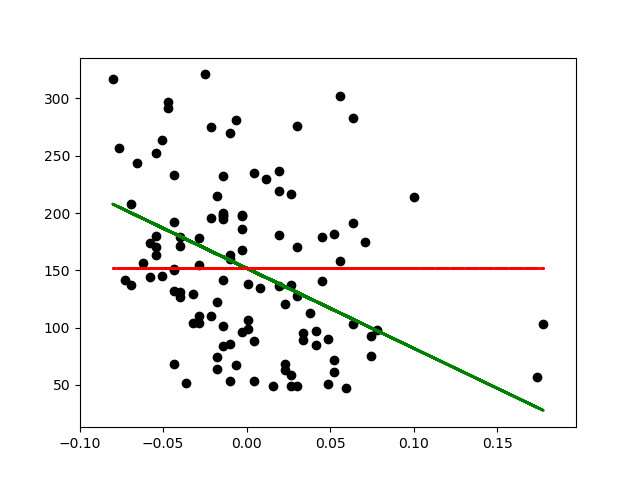

In [23]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', 
         linewidth=2, label = 'dummy')

plt.show()

### Model selection using evaluation metrics

#### Cross validation

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()
# again, making this a binary problem with 'digit 1' as positive class 
# and 'not 1' as negative class
X, y = dataset.data, dataset.target == 1
clf = SVC(kernel='linear', C=1)

# accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall'))

Cross-validation (accuracy) [ 0.91944444  0.98611111  0.97214485  0.97493036  0.96935933]
Cross-validation (AUC) [ 0.9641871   0.9976571   0.99372205  0.99699002  0.98675611]
Cross-validation (recall) [ 0.81081081  0.89189189  0.83333333  0.83333333  0.83333333]


#### Grid Search

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  0.996288047513
Test set AUC:  0.999828581224
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  0.99987412783
